# Mask R-CNN - Inspect Custom Trained Model

Code and visualizations to test, debug, and evaluate the Mask R-CNN model.

In [1]:
import os
import cv2
import sys
import random
import math
import re
import time
import numpy as np
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import skimage
import glob

# Root directory of the project
ROOT_DIR = os.getcwd()

# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library
from mrcnn import utils
from mrcnn import visualize
from mrcnn.visualize import display_images
import mrcnn.model as modellib
from mrcnn.model import log

import custom 

%matplotlib inline 

# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "logs")

custom_WEIGHTS_PATH = os.path.join(MODEL_DIR, "mask_rcnn_damage_0010.h5")  # TODO: update this path

Using TensorFlow backend.


## Configurations

In [2]:
config = custom.CustomConfig()
custom_DIR = os.path.join(ROOT_DIR, "customImages")

In [3]:
# Override the training configurations with a few
# changes for inferencing.
class InferenceConfig(config.__class__):
    # Run detection on one image at a time
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

config = InferenceConfig()
config.display()


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.9
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                14
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE                     [28, 28]
MAX_GT_INSTA

## Notebook Preferences

In [4]:
# Device to load the neural network on.
# Useful if you're training a model on the same 
# machine, in which case use CPU and leave the
# GPU for training.
DEVICE = "/cpu:0"  # /cpu:0 or /gpu:0

# Inspect the model in training or inference modes
# values: 'inference' or 'training'
# TODO: code for 'training' test mode not ready yet
TEST_MODE = "inference"

In [5]:
def get_ax(rows=1, cols=1, size=16):
    """Return a Matplotlib Axes array to be used in
    all visualizations in the notebook. Provide a
    central point to control graph sizes.
    
    Adjust the size attribute to control how big to render images
    """
    _, ax = plt.subplots(rows, cols, figsize=(size*cols, size*rows))
    return ax

## Load Validation Dataset

In [14]:
# Load validation dataset
dataset = custom.CustomDataset()
dataset.load_custom(custom_DIR, "val")

# Must call before using the dataset
dataset.prepare()

print("Images: {}\nClasses: {}".format(len(dataset.image_ids), dataset.class_names))

FileNotFoundError: [Errno 2] No such file or directory: 'D:\\GitHub\\mask_rcnn_damage_detection\\customImages\\val\\via_region_data.json'

## Load Model

In [6]:
# Create model in inference mode
with tf.device(DEVICE):
    model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR,
                              config=config)

W1106 18:43:35.541403 13236 deprecation_wrapper.py:119] From d:\programdata\anaconda3\envs\maskrcnn\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1106 18:43:35.547359 13236 deprecation_wrapper.py:119] From d:\programdata\anaconda3\envs\maskrcnn\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1106 18:43:35.550381 13236 deprecation_wrapper.py:119] From d:\programdata\anaconda3\envs\maskrcnn\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W1106 18:43:35.572319 13236 deprecation_wrapper.py:119] From d:\programdata\anaconda3\envs\maskrcnn\lib\site-packages\keras\backend\tensorflow_backend.py:1919: The name tf.nn.fused_batch_norm is deprecated. Please use tf.compat.v1.nn.fused_batch_norm instead.


In [7]:
# load the last model you trained
# weights_path = model.find_last()[1]

# Load weights
print("Loading weights ", custom_WEIGHTS_PATH)
model.load_weights(custom_WEIGHTS_PATH, by_name=True)

Loading weights  D:\MachineLearning\damageCar\logs\mask_rcnn_damage_0010.h5


In [8]:
from importlib import reload # was constantly changin the visualization, so I decided to reload it instead of notebook
reload(visualize)

<module 'mrcnn.visualize' from 'D:\\MachineLearning\\damageCar\\mrcnn\\visualize.py'>

# Run Detection on Images

In [9]:
class_names = ['BG', 'damage']

['exam.jpeg']
Processing 1 images
image                    shape: (720, 1200, 3)        min:    0.00000  max:  255.00000  uint8


d:\programdata\anaconda3\envs\maskrcnn\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  del sys.path[0]


molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1200.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


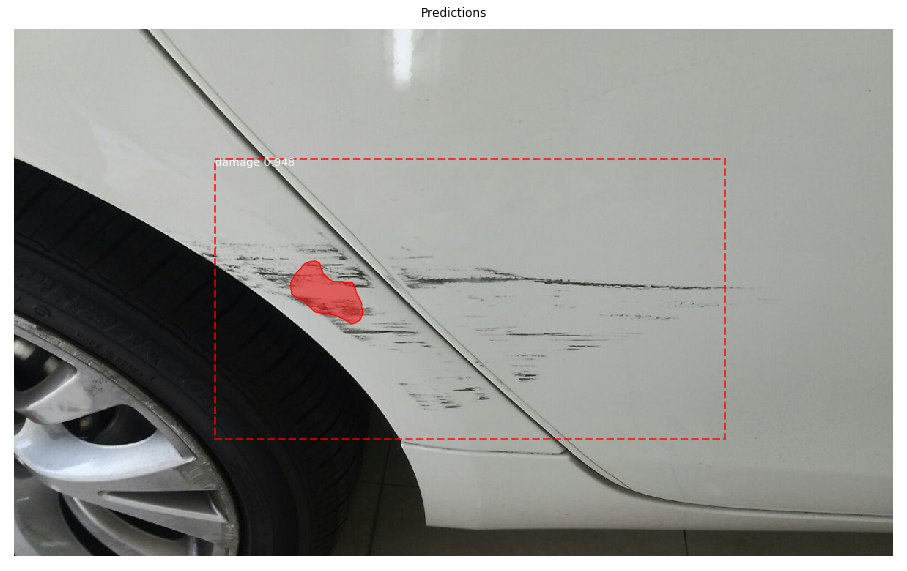

In [10]:
# image_id = random.choice(dataset.image_ids)
# image, image_meta, gt_class_id, gt_bbox, gt_mask =\
# modellib.load_image_gt(dataset, config, image_id, use_mini_mask=False)
# info = dataset.image_info[image_id]
# print("image ID: {}.{} ({}) {}".format(info["source"], info["id"], image_id, 
#                                        dataset.image_reference(image_id)))
from scipy import misc
# Load a random image from the images folder
img_DIR = os.path.join(custom_DIR, "val")
file_names = next(os.walk(img_DIR))[2]
print(file_names)
# image = skimage.io.imread(os.path.join(img_DIR, random.choice(file_names)))
image = misc.imread(os.path.join(img_DIR, random.choice(file_names)))
# Run object detection
results = model.detect([image], verbose=1)

# Display results
ax = get_ax(1)
r = results[0]
frame = visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                            class_names, r['scores'], ax=ax,
                            title="Predictions")

# log("gt_class_id", gt_class_id)
# log("gt_bbox", gt_bbox)
# log("gt_mask", gt_mask)

In [31]:
print(image)

[[[189 192 185]
  [190 193 186]
  [190 193 186]
  ...
  [163 166 159]
  [163 166 159]
  [163 166 159]]

 [[190 193 186]
  [190 193 186]
  [190 193 186]
  ...
  [164 167 160]
  [164 167 160]
  [164 167 160]]

 [[190 193 186]
  [190 193 186]
  [191 194 187]
  ...
  [164 167 160]
  [164 167 160]
  [165 168 161]]

 ...

 [[ 58  59  61]
  [102 103 105]
  [132 133 135]
  ...
  [ 47  47  39]
  [ 47  47  39]
  [ 48  48  40]]

 [[ 30  31  33]
  [ 79  80  82]
  [120 121 123]
  ...
  [ 48  48  40]
  [ 48  48  40]
  [ 48  48  40]]

 [[  5   6   8]
  [ 55  56  58]
  [105 106 108]
  ...
  [ 48  48  40]
  [ 49  49  41]
  [ 49  49  41]]]


In [12]:
from PIL import Image
import numpy as np

img = Image.fromarray(frame.astype(np.uint8), 'RGB')
img.save('static/image/my.jpg')

In [28]:
frame.figure.savefig('asdd.png')